# Proyek Analisis Data: Bike Sharing Dataset
- **Nama:** Keysha Lavinia
- **Email:** keyshaalvn@gmail.com
- **ID Dicoding:** keyshaalvn

## Menentukan Pertanyaan Bisnis

- Apakah ada perbedaan signifikan dalam pola penyewaan per jam selama hari libur dibandingkan dengan hari kerja biasa?
- Bagaimana perilaku penyewaan berbeda antara anggota terdaftar dan penyewa biasa dalam berbagai kondisi cuaca?


## Import Semua Packages/Library yang Digunakan

In [47]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

## Data Wrangling

### Gathering Data

In [48]:
days_df = pd.read_csv("https://raw.githubusercontent.com/keyshaa20/Bike-Sharing-Dataset/refs/heads/main/Bike%20Sharing%20Dataset/day.csv")
days_df.head()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,6,0,2,0.344167,0.363625,0.805833,0.160446,331,654,985
1,2,2011-01-02,1,0,1,0,0,0,2,0.363478,0.353739,0.696087,0.248539,131,670,801
2,3,2011-01-03,1,0,1,0,1,1,1,0.196364,0.189405,0.437273,0.248309,120,1229,1349
3,4,2011-01-04,1,0,1,0,2,1,1,0.200000,0.212122,0.590435,0.160296,108,1454,1562
4,5,2011-01-05,1,0,1,0,3,1,1,0.226957,0.229270,0.436957,0.186900,82,1518,1600


In [49]:
hour_df = pd.read_csv("https://raw.githubusercontent.com/keyshaa20/Bike-Sharing-Dataset/refs/heads/main/Bike%20Sharing%20Dataset/hour.csv")
hour_df.head()

,instant,dteday,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,0,6,0,1,0.24,0.2879,0.81,0.0,3,13,16
1,2,2011-01-01,1,0,1,1,0,6,0,1,0.22,0.2727,0.80,0.0,8,32,40
2,3,2011-01-01,1,0,1,2,0,6,0,1,0.22,0.2727,0.80,0.0,5,27,32
3,4,2011-01-01,1,0,1,3,0,6,0,1,0.24,0.2879,0.75,0.0,3,10,13
4,5,2011-01-01,1,0,1,4,0,6,0,1,0.24,0.2879,0.75,0.0,0,1,1


**Insight:**
- xxx
- xxx

### Assessing Data

In [50]:
days_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 731 entries, 0 to 730
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     731 non-null    int64  
 1   dteday      731 non-null    object 
 2   season      731 non-null    int64  
 3   yr          731 non-null    int64  
 4   mnth        731 non-null    int64  
 5   holiday     731 non-null    int64  
 6   weekday     731 non-null    int64  
 7   workingday  731 non-null    int64  
 8   weathersit  731 non-null    int64  
 9   temp        731 non-null    float64
 10  atemp       731 non-null    float64
 11  hum         731 non-null    float64
 12  windspeed   731 non-null    float64
 13  casual      731 non-null    int64  
 14  registered  731 non-null    int64  
 15  cnt         731 non-null    int64  
dtypes: float64(4), int64(11), object(1)
memory usage: 91.5+ KB


memeriksa duplikasi dan ringkasan parameter statistik dari days_df

In [51]:
print("Jumlah duplikasi: ",days_df.duplicated().sum())
days_df.describe()

Jumlah duplikasi:  0


,instant,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000
mean,366.000000,2.496580,0.500684,6.519836,0.028728,2.997264,0.683995,1.395349,0.495385,0.474354,0.627894,0.190486,848.176471,3656.172367,4504.348837
std,211.165812,1.110807,0.500342,3.451913,0.167155,2.004787,0.465233,0.544894,0.183051,0.162961,0.142429,0.077498,686.622488,1560.256377,1937.211452
min,1.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.059130,0.079070,0.000000,0.022392,2.000000,20.000000,22.000000
25%,183.500000,2.000000,0.000000,4.000000,0.000000,1.000000,0.000000,1.000000,0.337083,0.337842,0.520000,0.134950,315.500000,2497.000000,3152.000000
50%,366.000000,3.000000,1.000000,7.000000,0.000000,3.000000,1.000000,1.000000,0.498333,0.486733,0.626667,0.180975,713.000000,3662.000000,4548.000000
75%,548.500000,3.000000,1.000000,10.000000,0.000000,5.000000,1.000000,2.000000,0.655417,0.608602,0.730209,0.233214,1096.000000,4776.500000,5956.000000
max,731.000000,4.000000,1.000000,12.000000,1.000000,6.000000,1.000000,3.000000,0.861667,0.840896,0.972500,0.507463,3410.000000,6946.000000,8714.000000


In [52]:
hour_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17379 entries, 0 to 17378
Data columns (total 17 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     17379 non-null  int64  
 1   dteday      17379 non-null  object 
 2   season      17379 non-null  int64  
 3   yr          17379 non-null  int64  
 4   mnth        17379 non-null  int64  
 5   hr          17379 non-null  int64  
 6   holiday     17379 non-null  int64  
 7   weekday     17379 non-null  int64  
 8   workingday  17379 non-null  int64  
 9   weathersit  17379 non-null  int64  
 10  temp        17379 non-null  float64
 11  atemp       17379 non-null  float64
 12  hum         17379 non-null  float64
 13  windspeed   17379 non-null  float64
 14  casual      17379 non-null  int64  
 15  registered  17379 non-null  int64  
 16  cnt         17379 non-null  int64  
dtypes: float64(4), int64(12), object(1)
memory usage: 2.3+ MB


memeriksa duplikasi dan ringkasan parameter statistik dari hour_df

In [53]:
print("Jumlah duplikasi: ",hour_df.duplicated().sum())
hour_df.describe()

Jumlah duplikasi:  0


,instant,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,17379.0000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000
mean,8690.0000,2.501640,0.502561,6.537775,11.546752,0.028770,3.003683,0.682721,1.425283,0.496987,0.475775,0.627229,0.190098,35.676218,153.786869,189.463088
std,5017.0295,1.106918,0.500008,3.438776,6.914405,0.167165,2.005771,0.465431,0.639357,0.192556,0.171850,0.192930,0.122340,49.305030,151.357286,181.387599
min,1.0000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.020000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
25%,4345.5000,2.000000,0.000000,4.000000,6.000000,0.000000,1.000000,0.000000,1.000000,0.340000,0.333300,0.480000,0.104500,4.000000,34.000000,40.000000
50%,8690.0000,3.000000,1.000000,7.000000,12.000000,0.000000,3.000000,1.000000,1.000000,0.500000,0.484800,0.630000,0.194000,17.000000,115.000000,142.000000
75%,13034.5000,3.000000,1.000000,10.000000,18.000000,0.000000,5.000000,1.000000,2.000000,0.660000,0.621200,0.780000,0.253700,48.000000,220.000000,281.000000
max,17379.0000,4.000000,1.000000,12.000000,23.000000,1.000000,6.000000,1.000000,4.000000,1.000000,1.000000,1.000000,0.850700,367.000000,886.000000,977.000000


Hasil di atas menunjukkan bahwa tidak ada duplikasi pada days_df dan hour_df. Namun, terdapat kesalahan tipe data untuk kolom dteday. Kolom tersebut harusnya direpresentasikan sebagai tipe data datetime, bukan object

### Cleaning Data

Berdasarkan proses assessing data sebelumnya, diketahui bahwa terdapat kesalahan tipe data untuk kolom dteday.
Maka dari itu, kita dapat mengganti tipe data pada kolom dteday menjadi datetime. Proses ini dapat dilakukan menggunakan function to_datetime() yang disediakan oleh library pandas

In [54]:
datetime_columns = ["dteday"]

for column in datetime_columns:
  days_df[column] = pd.to_datetime(days_df[column])

Untuk memastikan hal ini berjalan sesuai harapan, periksa kembali tipe data tersebut menggunakan method info()

In [55]:
days_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 731 entries, 0 to 730
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   instant     731 non-null    int64         
 1   dteday      731 non-null    datetime64[ns]
 2   season      731 non-null    int64         
 3   yr          731 non-null    int64         
 4   mnth        731 non-null    int64         
 5   holiday     731 non-null    int64         
 6   weekday     731 non-null    int64         
 7   workingday  731 non-null    int64         
 8   weathersit  731 non-null    int64         
 9   temp        731 non-null    float64       
 10  atemp       731 non-null    float64       
 11  hum         731 non-null    float64       
 12  windspeed   731 non-null    float64       
 13  casual      731 non-null    int64         
 14  registered  731 non-null    int64         
 15  cnt         731 non-null    int64         
dtypes: datetime64[ns](1), floa

In [56]:
datetime_columns = ["dteday"]

for column in datetime_columns:
  hour_df[column] = pd.to_datetime(hour_df[column])

In [57]:
hour_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17379 entries, 0 to 17378
Data columns (total 17 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   instant     17379 non-null  int64         
 1   dteday      17379 non-null  datetime64[ns]
 2   season      17379 non-null  int64         
 3   yr          17379 non-null  int64         
 4   mnth        17379 non-null  int64         
 5   hr          17379 non-null  int64         
 6   holiday     17379 non-null  int64         
 7   weekday     17379 non-null  int64         
 8   workingday  17379 non-null  int64         
 9   weathersit  17379 non-null  int64         
 10  temp        17379 non-null  float64       
 11  atemp       17379 non-null  float64       
 12  hum         17379 non-null  float64       
 13  windspeed   17379 non-null  float64       
 14  casual      17379 non-null  int64         
 15  registered  17379 non-null  int64         
 16  cnt         17379 non-

## Exploratory Data Analysis (EDA)

### Explore ...

**Eksplorasi Data days_df**

In [58]:
days_df.describe(include="all")

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,731.000000,731,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000
mean,366.000000,2012-01-01 00:00:00,2.496580,0.500684,6.519836,0.028728,2.997264,0.683995,1.395349,0.495385,0.474354,0.627894,0.190486,848.176471,3656.172367,4504.348837
min,1.000000,2011-01-01 00:00:00,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.059130,0.079070,0.000000,0.022392,2.000000,20.000000,22.000000
25%,183.500000,2011-07-02 12:00:00,2.000000,0.000000,4.000000,0.000000,1.000000,0.000000,1.000000,0.337083,0.337842,0.520000,0.134950,315.500000,2497.000000,3152.000000
50%,366.000000,2012-01-01 00:00:00,3.000000,1.000000,7.000000,0.000000,3.000000,1.000000,1.000000,0.498333,0.486733,0.626667,0.180975,713.000000,3662.000000,4548.000000
75%,548.500000,2012-07-01 12:00:00,3.000000,1.000000,10.000000,0.000000,5.000000,1.000000,2.000000,0.655417,0.608602,0.730209,0.233214,1096.000000,4776.500000,5956.000000
max,731.000000,2012-12-31 00:00:00,4.000000,1.000000,12.000000,1.000000,6.000000,1.000000,3.000000,0.861667,0.840896,0.972500,0.507463,3410.000000,6946.000000,8714.000000
std,211.165812,NaN,1.110807,0.500342,3.451913,0.167155,2.004787,0.465233,0.544894,0.183051,0.162961,0.142429,0.077498,686.622488,1560.256377,1937.211452


Berdasarkan data diatas, bisa kita gunakan untuk mencari informasi nilai jumlah penyewa casual dan registered di setiap cuaca tertentu dengan menggunakan method groupby() lalu, mengurutkan nilainya menggunakan method sort_values() secara descending.

In [59]:
days_df.groupby(by="weathersit").registered.nunique().sort_values(ascending=False)

,registered
weathersit,
1,449
2,239
3,21


In [60]:
days_df.groupby(by="weathersit").casual.nunique().sort_values(ascending=False)

,casual
weathersit,
1,407
2,231
3,21


**Insight:**


*   casual: count of casual users
*   registered: count of registered users
*   weathersit :
    - 1: Clear, Few clouds, Partly cloudy, Partly cloudy
    - 2: Mist + Cloudy, Mist + Broken clouds, Mist + Few clouds, Mist
    - 3: Light Snow, Light Rain + Thunderstorm + Scattered clouds, Light Rain + Scattered clouds
    - 4: Heavy Rain + Ice Pallets + Thunderstorm + Mist, Snow + Fog

Berdasarkan data yang disajikan, terdapat perbedaan signifikan antara jumlah pengguna sepeda sewaan terdaftar dan pengguna kasual berdasarkan kondisi cuaca. Untuk situasi cuaca yang cerah atau sedikit mendung (weathersit 1), jumlah pengguna terdaftar mencapai 449, sementara pengguna kasual sedikit lebih rendah dengan 407. Hal ini menunjukkan bahwa cuaca yang baik mendorong penggunaan sepeda, baik oleh pengguna terdaftar maupun kasual. Pada situasi cuaca berkabut dan mendung (weathersit 2), jumlah pengguna terdaftar menurun menjadi 239, sementara pengguna kasual juga mengalami penurunan menjadi 231, meskipun tetap memiliki proporsi yang hampir sama. Situasi cuaca yang lebih ekstrem, seperti hujan ringan atau salju (weathersit 3), menunjukkan bahwa baik pengguna terdaftar maupun kasual sangat berkurang, dengan masing-masing hanya 21 pengguna. Data ini menunjukkan bahwa cuaca yang buruk secara signifikan memengaruhi minat masyarakat untuk menggunakan sepeda sewaan. Selain itu, tidak ada data yang dicatat untuk situasi cuaca berat (weathersit 4), yang mungkin menunjukkan bahwa kondisi ekstrem tersebut membuat penggunaan sepeda tidak praktis atau aman. Berdasarkan analisis ini menunjukkan bahwa faktor cuaca sangat berpengaruh terhadap pola penggunaan sepeda sewaan di kalangan pengguna terdaftar dan kasual.

**Eksplorasi Data hour_df**

In [61]:
hour_df.describe(include="all")

,instant,dteday,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,17379.0000,17379,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000
mean,8690.0000,2012-01-02 04:08:34.552045568,2.501640,0.502561,6.537775,11.546752,0.028770,3.003683,0.682721,1.425283,0.496987,0.475775,0.627229,0.190098,35.676218,153.786869,189.463088
min,1.0000,2011-01-01 00:00:00,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.020000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
25%,4345.5000,2011-07-04 00:00:00,2.000000,0.000000,4.000000,6.000000,0.000000,1.000000,0.000000,1.000000,0.340000,0.333300,0.480000,0.104500,4.000000,34.000000,40.000000
50%,8690.0000,2012-01-02 00:00:00,3.000000,1.000000,7.000000,12.000000,0.000000,3.000000,1.000000,1.000000,0.500000,0.484800,0.630000,0.194000,17.000000,115.000000,142.000000
75%,13034.5000,2012-07-02 00:00:00,3.000000,1.000000,10.000000,18.000000,0.000000,5.000000,1.000000,2.000000,0.660000,0.621200,0.780000,0.253700,48.000000,220.000000,281.000000
max,17379.0000,2012-12-31 00:00:00,4.000000,1.000000,12.000000,23.000000,1.000000,6.000000,1.000000,4.000000,1.000000,1.000000,1.000000,0.850700,367.000000,886.000000,977.000000
std,5017.0295,NaN,1.106918,0.500008,3.438776,6.914405,0.167165,2.005771,0.465431,0.639357,0.192556,0.171850,0.192930,0.122340,49.305030,151.357286,181.387599


Berdasarkan data diatas, bisa kita gunakan untuk mencari informasi nilai jumlah penyewaan berdasarkan hari kerja, akhir pekan dan hari libur. Dengan menggunakan method groupby() yang diikuti dengan method agg(). Selain itu, dapat juga mencari informasi mengenai jumlah sewa perharinya.

In [62]:
hour_df.groupby(by=["weekday"]).agg({
    "cnt": "sum",
})

,cnt
weekday,
0,444027
1,455503
2,469109
3,473048
4,485395
5,487790
6,477807


In [63]:
hour_df.groupby(by=["workingday", "weekday"]).agg({
    "cnt": "sum",
})

cnt
workingday weekday        
0          0        444027
           1         59605
           2          1013
           3          7403
           4          3920
           5          6494
           6        477807
1          1        395898
           2        468096
           3        465645
           4        481475
           5        481296


*   Workingday: Jika hari bukan akhir pekan atau hari libur adalah 1, sebaliknya adalah 0
*   weekday : hari dalam seminggu
0: Minggu
1: Senin
2: Selasa
3: Rabu
4: Kamis
5: Jumat
6: Sabtu
*  cnt: hitungan total sepeda sewaan termasuk sepeda kasual dan terdaftar

Berdasarkan hasil analisis tersebut, jumlah penyewaan sepeda menunjukkan pola yang menarik terkait dengan hari kerja dan akhir pekan atau hari libur. Data menunjukkan bahwa hari kerja memiliki nilai sewa yang lebih tinggi daripada hari libur ataupun akhir pekan dengan hari Kamis yang mencatat angka penyewaan tertinggi, mencapai 481475. Hal ini mungkin disebabkan oleh banyaknya orang yang bekerja atau beraktivitas di hari kerja menggunakan sepeda. Sebaliknya, pada masa liburan di hari-hari biasa seperti Selasa dan Rabu menunjukkan jumlah penyewaan yang lebih rendah, masing-masing hanya 1013 dan 7403, yang mengindikasikan bahwa orang cenderung tidak menggunakan sepeda untuk beraktivitas pada hari-hari tersebut di masa liburan. Namun, meski begitu pada akhir pekan seperti sabtu dan minggu jumlah penyewaan memiliki nilai yang cukup tinggi yaitu 477807 di hari sabtu dan 444027 di hari minggu.

Membuat sebuah DataFrame baru bernama all_df untuk menampung semua informasi dari kedua tabel yang dimiliki.

In [64]:
all_df = pd.merge(
    left=days_df,
    right=hour_df,
    how="left",
    left_on="dteday",
    right_on="dteday"
)
all_df.head()

,instant_x,dteday,season_x,yr_x,mnth_x,holiday_x,weekday_x,workingday_x,weathersit_x,temp_x,...,weekday_y,workingday_y,weathersit_y,temp_y,atemp_y,hum_y,windspeed_y,casual_y,registered_y,cnt_y
0,1,2011-01-01,1,0,1,0,6,0,2,0.344167,...,6,0,1,0.24,0.2879,0.81,0.0,3,13,16
1,1,2011-01-01,1,0,1,0,6,0,2,0.344167,...,6,0,1,0.22,0.2727,0.80,0.0,8,32,40
2,1,2011-01-01,1,0,1,0,6,0,2,0.344167,...,6,0,1,0.22,0.2727,0.80,0.0,5,27,32
3,1,2011-01-01,1,0,1,0,6,0,2,0.344167,...,6,0,1,0.24,0.2879,0.75,0.0,3,10,13
4,1,2011-01-01,1,0,1,0,6,0,2,0.344167,...,6,0,1,0.24,0.2879,0.75,0.0,0,1,1


## Visualization & Explanatory Analysis

### Pertanyaan 1:

**Apakah ada perbedaan signifikan dalam pola penyewaan per jam selama hari libur dibandingkan dengan hari kerja biasa?**

ax[0] merupakan object untuk kanvas pertama (bagian kiri) dan ax[1] merupakan object untuk kanvas kedua (bagian kanan). Berikut hasil visualisasi data yang diperoleh.

<ipython-input-65-b4b681f75cb5>:15: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x="workingday", y="customer_count", data=byworkingday_df.head(5), palette=colors, ax=ax[0])
<ipython-input-65-b4b681f75cb5>:15: UserWarning: The palette list has more values (5) than needed (2), which may not be intended.
  sns.barplot(x="workingday", y="customer_count", data=byworkingday_df.head(5), palette=colors, ax=ax[0])
<ipython-input-65-b4b681f75cb5>:21: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x="weekday", y="customer_count", data=byweekday_df.sort_values(by="weekday", ascending=False).head(5), palette=colors, ax=ax[1])


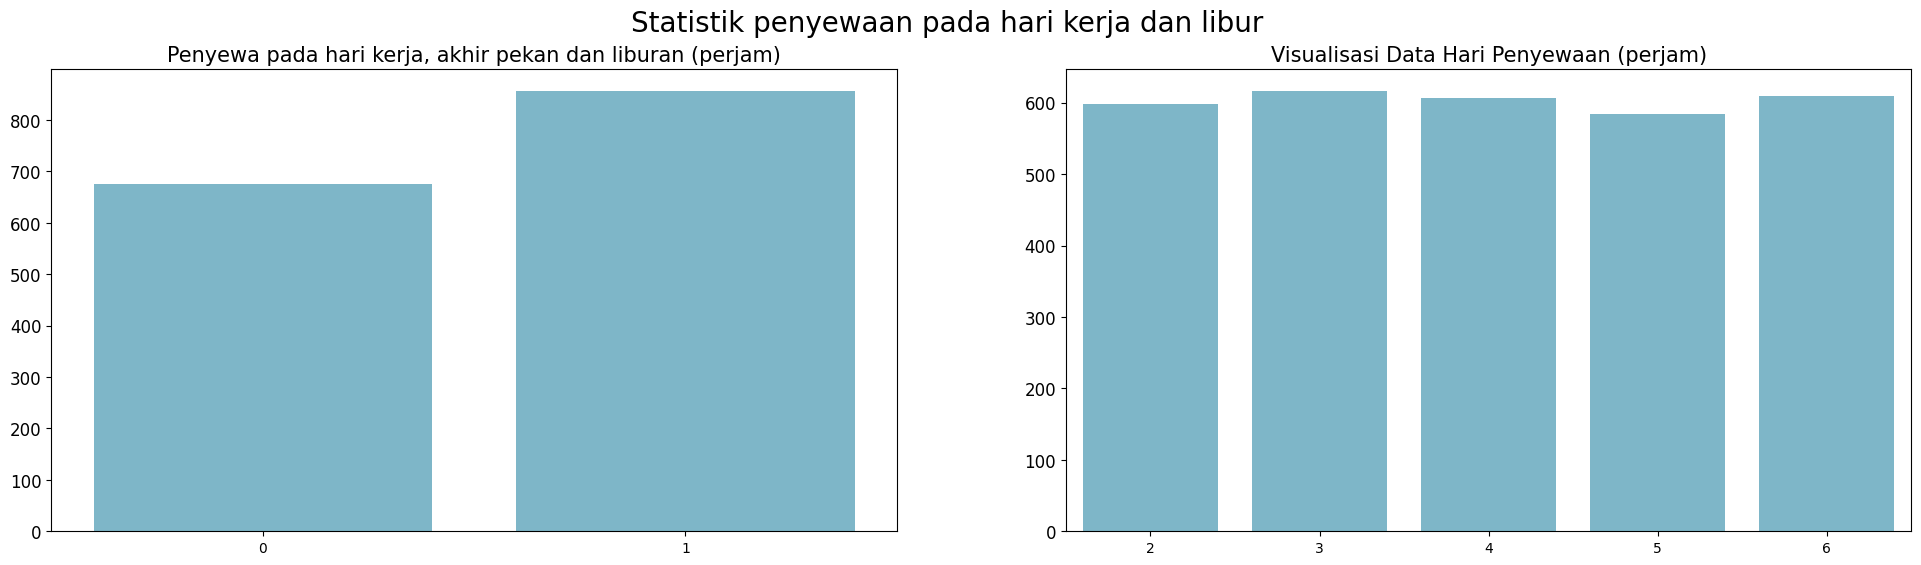

In [65]:
fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(24, 6))

colors = ["#72BCD4", "#72BCD4", "#72BCD4", "#72BCD4", "#72BCD4"]

byworkingday_df = hour_df.groupby(by="workingday").cnt.nunique().reset_index()
byworkingday_df.rename(columns={
    "cnt": "customer_count"
}, inplace=True)

byweekday_df = hour_df.groupby(by="weekday").cnt.nunique().reset_index()
byweekday_df.rename(columns={
    "cnt": "customer_count"
}, inplace=True)

sns.barplot(x="workingday", y="customer_count", data=byworkingday_df.head(5), palette=colors, ax=ax[0])
ax[0].set_ylabel(None)
ax[0].set_xlabel(None)
ax[0].set_title("Penyewa pada hari kerja, akhir pekan dan liburan (perjam)", loc="center", fontsize=15)
ax[0].tick_params(axis ='y', labelsize=12)

sns.barplot(x="weekday", y="customer_count", data=byweekday_df.sort_values(by="weekday", ascending=False).head(5), palette=colors, ax=ax[1])
ax[1].set_ylabel(None)
ax[1].set_xlabel(None)
ax[1].set_title("Visualisasi Data Hari Penyewaan (perjam)", loc="center", fontsize=15)
ax[1].tick_params(axis='y', labelsize=12)

plt.suptitle("Statistik penyewaan pada hari kerja dan libur ", fontsize=20)
plt.show()

### Pertanyaan 2:

Untuk membuat visualisasi kita dapat menggunakan Seaborn untuk membuat grafik batang. y diatur ke registered_count dan x diatur ke weathersit. Lalu, data diurutkan berdasarkan registered_count secara menurun untuk penampilan yang lebih jelas.

**Bagaimana perilaku penyewaan berbeda antara anggota terdaftar dan penyewa biasa dalam berbagai kondisi cuaca?**

<ipython-input-66-a3894ec29461>:10: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(
<ipython-input-66-a3894ec29461>:10: UserWarning: The palette list has more values (5) than needed (3), which may not be intended.
  sns.barplot(


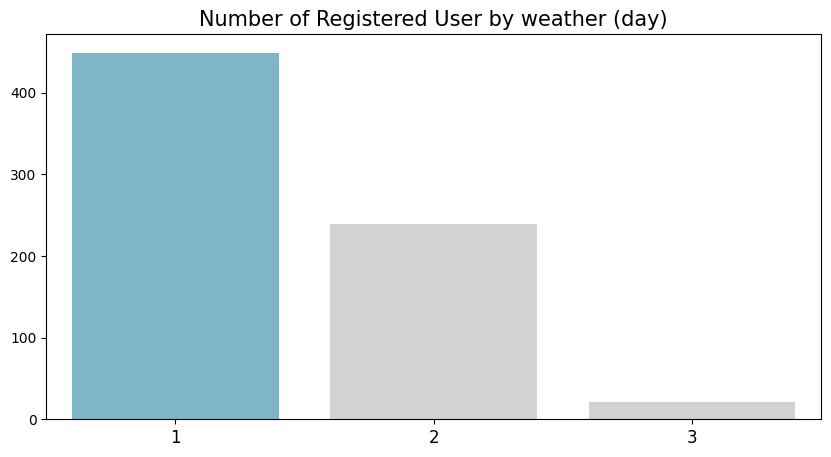

In [66]:
colors = ["#72BCD4", "#D3D3D3", "#D3D3D3", "#D3D3D3", "#D3D3D3"]

byweather_df = days_df.groupby(by="weathersit").registered.nunique().reset_index()
byweather_df.rename(columns={
    "registered": "registered_count"
}, inplace=True)

plt.figure(figsize=(10, 5))

sns.barplot(
    y="registered_count",
    x="weathersit",
    data=byweather_df.sort_values(by="registered_count", ascending=False),
    palette=colors
)
plt.title("Number of Registered User by weather (day)", loc="center", fontsize=15)
plt.ylabel(None)
plt.xlabel(None)
plt.tick_params(axis='x', labelsize=12)
plt.show()

<ipython-input-67-a0938e3a20f0>:10: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(
<ipython-input-67-a0938e3a20f0>:10: UserWarning: The palette list has more values (5) than needed (3), which may not be intended.
  sns.barplot(


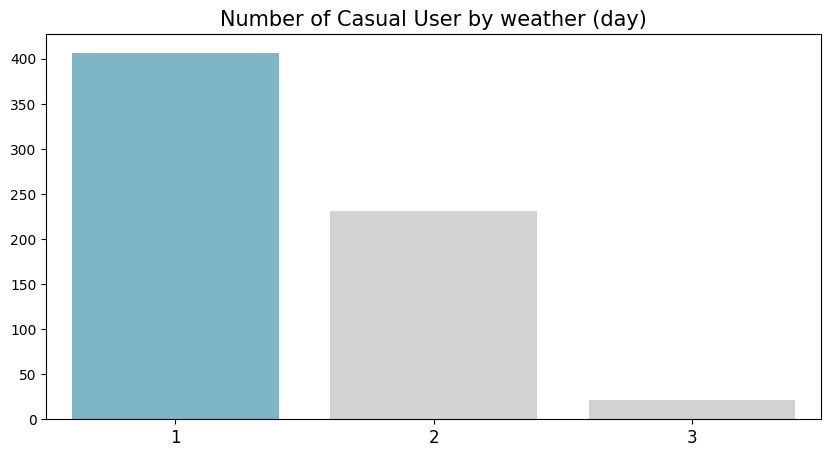

In [67]:
colors = ["#72BCD4", "#D3D3D3", "#D3D3D3", "#D3D3D3", "#D3D3D3"]

byweather_df = days_df.groupby(by="weathersit").casual.nunique().reset_index()
byweather_df.rename(columns={
    "casual": "casual_count"
}, inplace=True)

plt.figure(figsize=(10, 5))

sns.barplot(
    y="casual_count",
    x="weathersit",
    data=byweather_df.sort_values(by="casual_count", ascending=False),
    palette=colors
)
plt.title("Number of Casual User by weather (day)", loc="center", fontsize=15)
plt.ylabel(None)
plt.xlabel(None)
plt.tick_params(axis='x', labelsize=12)
plt.show()

## Analisis Lanjutan (Opsional)

## Conclusion

- Conclusion pertanyaan no 1

Berdasarkan analisis, terdapat perbedaan signifikan dalam pola penyewaan sepeda per jam antara hari kerja dan hari libur. Pada hari kerja, terutama Kamis, penyewaan cenderung lebih tinggi karena banyak orang menggunakan sepeda untuk aktivitas sehari-hari. Sebaliknya, pada hari libur, terutama Selasa dan Rabu, tingkat penyewaan jauh lebih rendah, menunjukkan bahwa orang tidak banyak menggunakan sepeda. Meskipun akhir pekan menunjukkan angka penyewaan yang lebih tinggi, pola puncaknya masih berbeda dan tidak seintensif hari kerja. Hal ini menegaskan bahwa penyewaan sepeda lebih konsisten pada hari kerja dibandingkan dengan hari libur.
- Conclusion pertanyaan no 2

Dalam analisis ini, ditemukan bahwa kondisi cuaca berpengaruh signifikan terhadap penggunaan sepeda sewaan. Pada cuaca cerah atau sedikit mendung, pengguna terdaftar mencapai 449 orang, sementara pengguna kasual 407 orang. Namun, pada cuaca berkabut dan mendung, jumlah pengguna terdaftar dan kasual menurun menjadi 239 dan 231, dan pada cuaca ekstrem seperti hujan ringan atau salju, hanya 21 pengguna yang tercatat. Tidak ada data untuk kondisi cuaca berat, menunjukkan bahwa faktor keselamatan mungkin menghalangi penggunaan sepeda. Kesimpulannya, cuaca merupakan faktor kunci dalam menentukan pola penggunaan sepeda sewaan.

In [68]:
all_df.to_csv("all_data.csv", index=False)